<a href="https://colab.research.google.com/github/VISHAL2077/SML_Assignments/blob/main/Assignement_3_SML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore the Gemini API</h2>
  <p>The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.
  </p>
  <strong>How to get started</strong>
    <ol>
      <li>Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google account.</li>
      <li><a href="https://aistudio.google.com/app/apikey">Create an API key</a>.</li>
      <li>Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb">Python</a>, or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.</li>
      </ol>
  <strong>Explore use cases</strong>
    <ul>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb">Create a marketing campaign</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Audio.ipynb">Analyze audio recordings</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/System_instructions.ipynb">Use System instructions in chat</a></li>
    </ul>
  <p>To learn more, check out the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.
  </p>
</div>


<msg desc="Text shown above a link to https://www.youtube.com/watch?v=V7RXyqFUR98 which highlights some helpful features in Colab">Colab now has AI features powered by <a href="https://gemini.google.com">Gemini</a>. The video below provides information on how to use these features, whether you're new to Python, or a seasoned veteran.</msg>

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  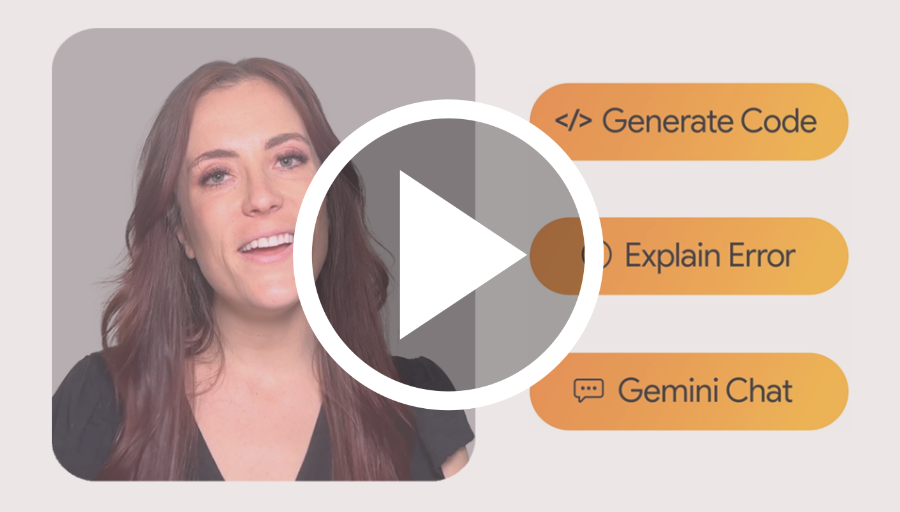
  </a>
</center>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


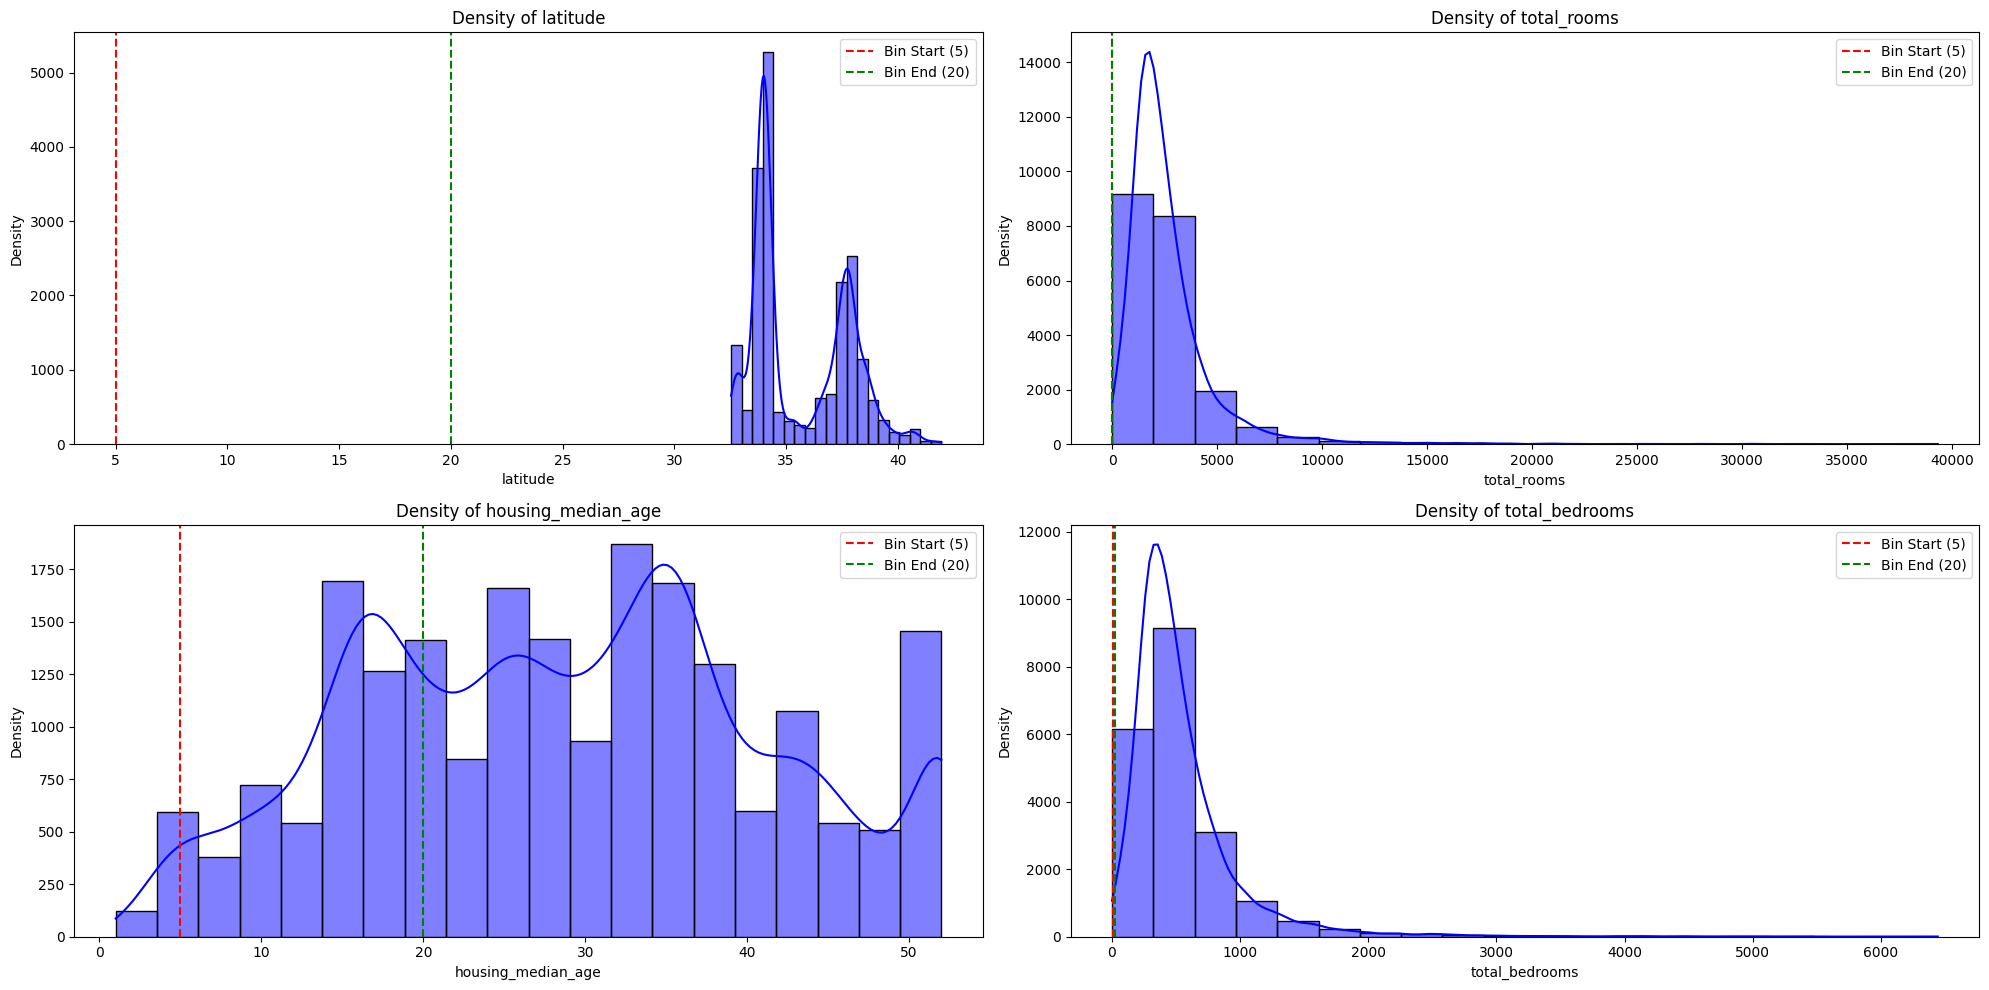

In [ ]:
"Assignment 3, question 1"
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

file_path = '/content/drive/MyDrive/housing.csv'
housing_data = pd.read_csv(file_path)

columns_to_analyze = ['latitude', 'total_rooms', 'housing_median_age', 'total_bedrooms']
bin_edges = [5, 10, 15, 20]

plt.figure(figsize=(20, 10))

for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(2, 2, i)
    sns.histplot(housing_data[column].dropna(), bins=20, kde=True, color='blue')
    plt.title(f'Density of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.axvline(bin_edges[0], color='red', linestyle='--', label=f'Bin Start ({bin_edges[0]})')
    plt.axvline(bin_edges[-1], color='green', linestyle='--', label=f'Bin End ({bin_edges[-1]})')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
"Assignment 3, question 2"
import pandas as pd
import numpy as np
from scipy.optimize import minimize

url = '/content/drive/MyDrive/housing.csv'
df = pd.read_csv(url)

latitude = df['latitude'].dropna()

def log_likelihood(params, data):
    mu, sigma2 = params
    n = len(data)
    if sigma2 <= 0:
        return np.inf
    term1 = -n / 2 * np.log(2 * np.pi)
    term2 = -n / 2 * np.log(sigma2)
    term3 = -1 / (2 * sigma2) * np.sum((data - mu) ** 2)
    return - (term1 + term2 + term3)

initial_guess = [latitude.mean(), latitude.var()]
result = minimize(log_likelihood, initial_guess, args=(latitude,), method='L-BFGS-B', bounds=[(None, None), (1e-10, None)])

mu_hat, sigma2_hat = result.x

def calculate_log_likelihood(mu, sigma2, data):
    n = len(data)
    if sigma2 <= 0:
        return np.inf
    term1 = -n / 2 * np.log(2 * np.pi)
    term2 = -n / 2 * np.log(sigma2)
    term3 = -1 / (2 * sigma2) * np.sum((data - mu) ** 2)
    return -(term1 + term2 + term3)

sigma2_values = [50, 75, 80]
log_likelihood_values = [calculate_log_likelihood(mu_hat, sigma2, latitude) for sigma2 in sigma2_values]

print(f"Estimated mu: {mu_hat}")
print(f"Estimated sigma^2: {sigma2_hat}")
print(f"Log-likelihood values for sigma^2 = 50, 75, 80: {log_likelihood_values}")



Estimated mu: 35.63186143410853
Estimated sigma^2: 4.562075895796675
Log-likelihood values for sigma^2 = 50, 75, 80: [60280.58032019993, 64151.10970959717, 64777.91343195204]


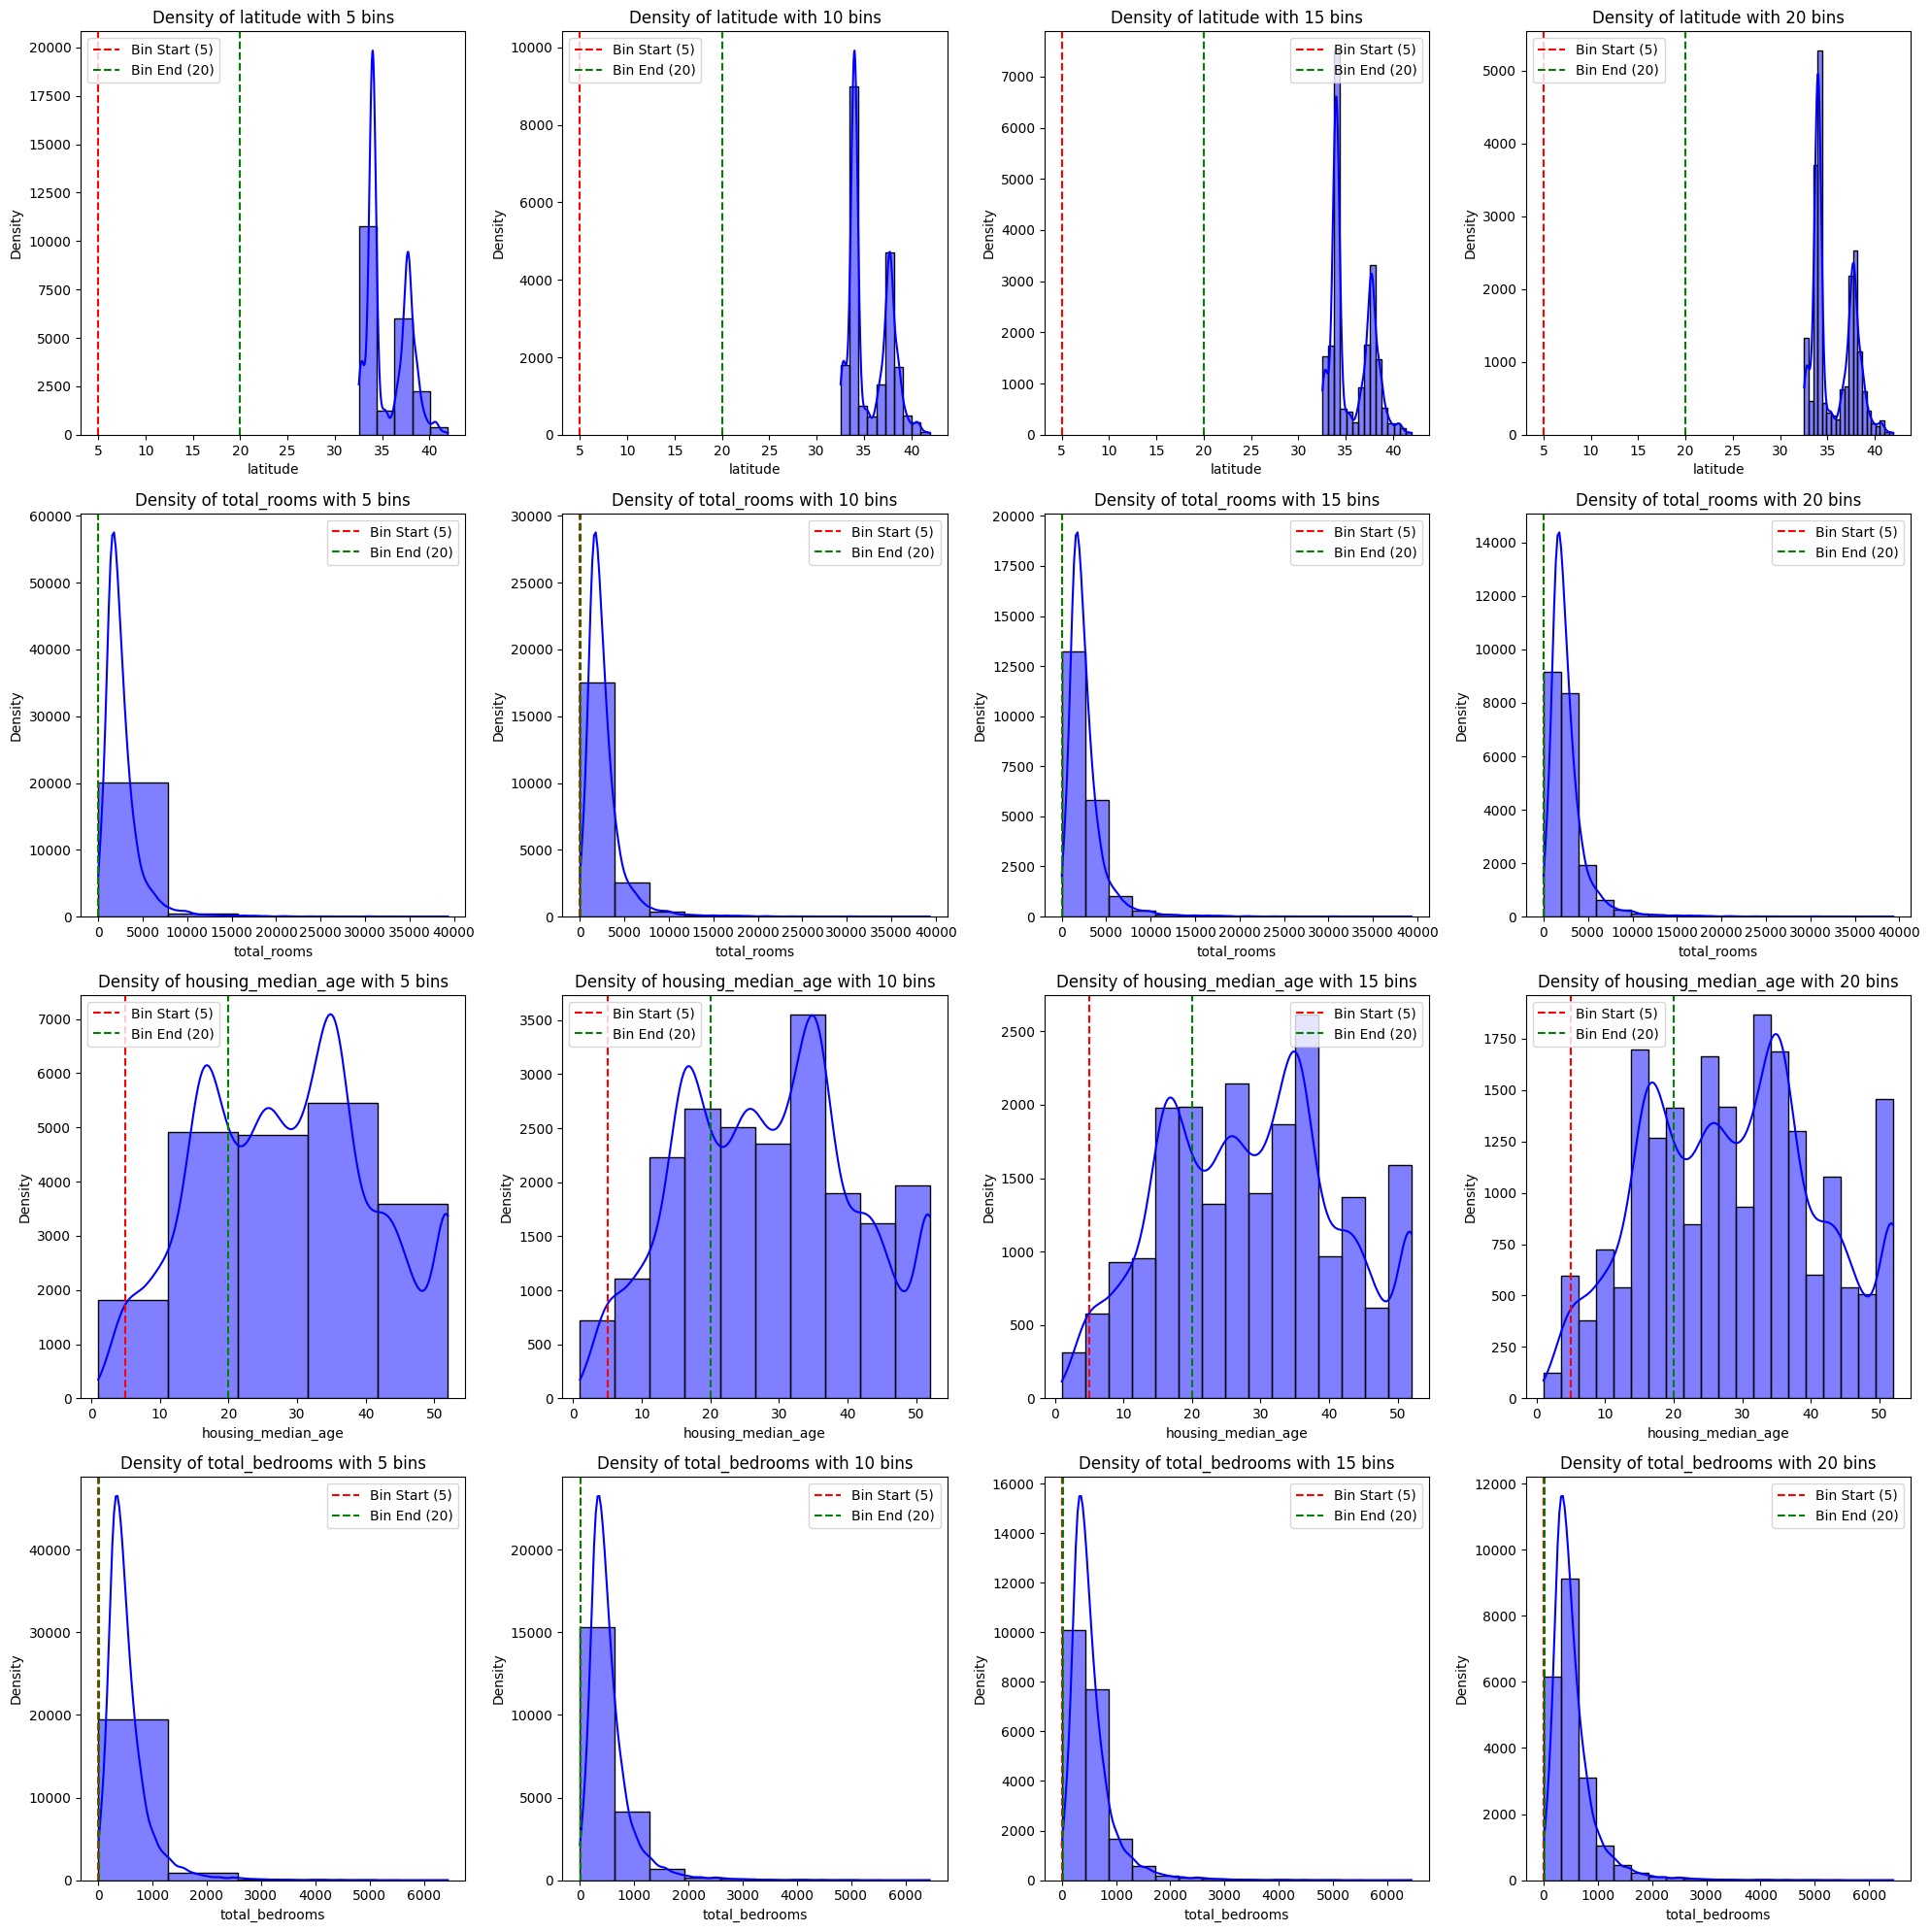

In [ ]:
"assignment 3, question 3"
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

file_path = '/content/drive/MyDrive/housing.csv'
housing_data = pd.read_csv(file_path)

columns_to_analyze = ['latitude', 'total_rooms', 'housing_median_age', 'total_bedrooms']
bin_edges = [5, 10, 15, 20]

plt.figure(figsize=(20, 20))

for i, column in enumerate(columns_to_analyze):
    for j, bin_count in enumerate(bin_edges):
        plt.subplot(4, 4, i * 4 + j + 1)
        sns.histplot(housing_data[column].dropna(), bins=bin_count, kde=True, color='blue')
        plt.title(f'Density of {column} with {bin_count} bins')
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.axvline(bin_edges[0], color='red', linestyle='--', label=f'Bin Start ({bin_edges[0]})')
        plt.axvline(bin_edges[-1], color='green', linestyle='--', label=f'Bin End ({bin_edges[-1]})')
        plt.legend()

plt.tight_layout()
plt.show()
